25th 
CNN Activation Maps

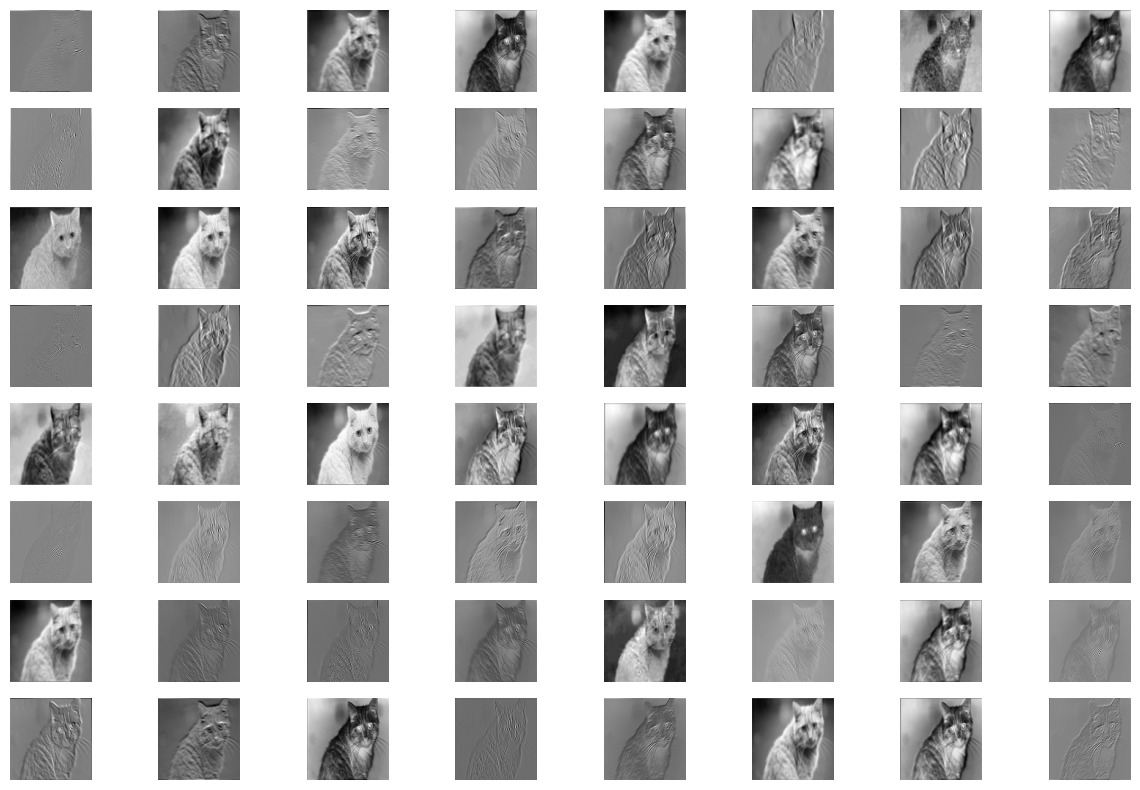

In [2]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision.models import resnet18, ResNet18_Weights

# Load a pretrained ResNet-18 model with the updated syntax
model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
model.eval()

# Load and preprocess the image
image_path = "cat.jpg"  # Ensure you have an image named 'cat.jpg' in your working directory
image = Image.open(image_path)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Extract activation maps from the first convolutional layer
def hook_fn(module, input, output):
    global activation_maps
    activation_maps = output.detach()

first_conv_layer = model.conv1
hook = first_conv_layer.register_forward_hook(hook_fn)

# Perform forward pass
with torch.no_grad():
    model(input_tensor)

# Remove the hook
hook.remove()

# Visualizing the activation maps
activation_maps = activation_maps.squeeze(0)  # Remove batch dimension
num_filters = activation_maps.shape[0]
num_cols = 8
num_rows = num_filters // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    if i < num_filters:
        ax.imshow(activation_maps[i].cpu().numpy(), cmap='gray')
        ax.axis('off')
plt.show()